## Homework

> Note: sometimes your answer doesn't match one of 
> the options exactly. That's fine. 
> Select the option that's closest to your solution.



### Dataset

In this homework, we will use the California Housing Prices from [Kaggle](https://www.kaggle.com/datasets/camnugent/california-housing-prices).

Here's a wget-able [link](https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv):

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
```

The goal of this homework is to create a regression model for predicting housing prices (column `'median_house_value'`).


### Preparing the dataset 

For this homework, we only want to use a subset of data. This is the same subset we used in homework #2.
But in contrast to homework #2, we are going to use all columns of the dataset.

First, keep only the records where `ocean_proximity` is either `'<1H OCEAN'` or `'INLAND'`

Preparation:

* Fill missing values with zeros.
* Apply the log transform to `median_house_value`.
* Do train/validation/test split with 60%/20%/20% distribution. 
* Use the `train_test_split` function and set the `random_state` parameter to 1.
* Use `DictVectorizer(sparse=True)` to turn the dataframes into matrices.

In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv

--2023-10-23 20:25:41--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/housing.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1423529 (1,4M) [text/plain]
Saving to: 'housing.csv.1'

     0K .......... .......... .......... .......... ..........  3% 2,96M 0s
    50K .......... .......... .......... .......... ..........  7% 81,6M 0s
   100K .......... .......... .......... .......... .......... 10% 86,4M 0s
   150K .......... .......... .......... .......... .......... 14% 19,9M 0s
   200K .......... .......... .......... .......... .......... 17% 5,42M 0s
   250K .......... .......... .......... .......... .......... 21% 9,71M 0s
   300K .......... .......... .......... .......... .......... 25% 5,96M 0s
   350K .......... .......... 

In [3]:
import pandas as pd 
import numpy as np

In [13]:
df = pd.read_csv('housing.csv')

In [5]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [16]:
df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64

In [15]:
df.total_bedrooms = df.total_bedrooms.fillna(0)

In [19]:
df.median_house_value = np.log1p(df.median_house_value.values)

In [20]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,13.022766,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,12.789687,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,12.771673,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,12.740520,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,12.743154,NEAR BAY


In [21]:
df = df[(df.ocean_proximity == '<1H OCEAN') | (df.ocean_proximity == 'INLAND')]

In [22]:
df.ocean_proximity.unique()

array(['<1H OCEAN', 'INLAND'], dtype=object)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=1)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=1)
len(df_train), len(df_val), len(df_test)

(9411, 3138, 3138)

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [26]:
y_train = df_train.median_house_value.values
y_val = df_val.median_house_value.values
y_test = df_test.median_house_value.values

In [28]:
del df_train['median_house_value']
del df_val['median_house_value']
del df_test['median_house_value']

In [30]:
from sklearn.feature_extraction import DictVectorizer
from sklearn.metrics import roc_auc_score

In [31]:
dv = DictVectorizer(sparse=False)

In [61]:
X_train = dv.fit_transform(df_train.to_dict(orient='records'))
X_val = dv.transform(df_val.to_dict(orient='records'))
X_test = dv.transform(df_test.to_dict(orient='records'))

In [62]:
X_val

array([[ 647.  ,   12.  ,   38.48, ..., 1882.  ,  670.  , 4174.  ],
       [ 125.  ,   22.  ,   36.93, ...,  542.  ,  132.  ,  569.  ],
       [ 203.  ,   20.  ,   39.95, ...,  601.  ,  238.  , 1349.  ],
       ...,
       [ 343.  ,   25.  ,   33.76, ...,  581.  ,  547.  , 2616.  ],
       [ 316.  ,   21.  ,   36.73, ..., 1347.  ,  358.  , 1702.  ],
       [ 859.  ,   24.  ,   34.06, ..., 2174.  ,  952.  , 4043.  ]])

## Question 1

Let's train a decision tree regressor to predict the `median_house_value` variable. 

* Train a model with `max_depth=1`.


Which feature is used for splitting the data?

- [x] `ocean_proximity`
- [ ] `total_rooms`
- [ ] `latitude`
- [ ] `population`

In [48]:
from sklearn.tree import DecisionTreeRegressor

In [51]:
dt = DecisionTreeRegressor(max_depth=1)

In [52]:
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=1)

In [64]:
y_pred = dt.predict(X_val)
y_pred

array([12.30066927, 12.30066927, 11.60680734, ..., 11.60680734,
       11.60680734, 11.60680734])

In [67]:
len(y_val), len(y_pred)

(3138, 3138)

In [69]:
from sklearn.tree import export_text

In [70]:
print(export_text(dt, feature_names=list(dv.get_feature_names_out())))

|--- ocean_proximity=<1H OCEAN <= 0.50
|   |--- value: [11.61]
|--- ocean_proximity=<1H OCEAN >  0.50
|   |--- value: [12.30]



## Question 2

Train a random forest model with these parameters:

* `n_estimators=10`
* `random_state=1`
* `n_jobs=-1` (optional - to make training faster)


What's the RMSE of this model on validation?

- [ ] 0.045
- [x] 0.245
- [ ] 0.545
- [ ] 0.845

In [71]:
from sklearn.ensemble import RandomForestRegressor

In [73]:
rf = RandomForestRegressor(n_estimators=10, random_state=1, n_jobs=-1)

In [74]:
rf.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, n_jobs=-1, random_state=1)

In [75]:
y_pred = rf.predict(X_val)

In [76]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [77]:
score = rmse(y_val, y_pred)
score

0.24459962783255346

## Question 3

Now let's experiment with the `n_estimators` parameter

* Try different values of this parameter from 10 to 200 with step 10.
* Set `random_state` to `1`.
* Evaluate the model on the validation dataset.


After which value of `n_estimators` does RMSE stop improving?
Consider 3 decimal places for retrieving the answer.

- [ ] 10
- [ ] 25
- [x] 50
- [ ] 160

In [78]:
def random_forest(n_estimators):
    rf = RandomForestRegressor(n_estimators=n_estimators, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    
    return n_estimators, score

In [91]:
results = []
for i in range(10, 201, 10):
    print(f'Getting n_est: {i}')
    results.append(random_forest(i))
    
df_r = pd.DataFrame(results, columns=['n_estimators', 'score'])

Getting n_est: 10
Getting n_est: 20
Getting n_est: 30
Getting n_est: 40
Getting n_est: 50
Getting n_est: 60
Getting n_est: 70
Getting n_est: 80
Getting n_est: 90
Getting n_est: 100
Getting n_est: 110
Getting n_est: 120
Getting n_est: 130
Getting n_est: 140
Getting n_est: 150
Getting n_est: 160
Getting n_est: 170
Getting n_est: 180
Getting n_est: 190
Getting n_est: 200


In [92]:
df_r

,n_estimators,score
0,10,0.244600
1,20,0.237804
2,30,0.236207
3,40,0.234715
4,50,0.234576
5,60,0.234197
6,70,0.234187
7,80,0.234388
8,90,0.234304
9,100,0.234130


In [93]:
from matplotlib import pyplot as plt
%matplotlib inline

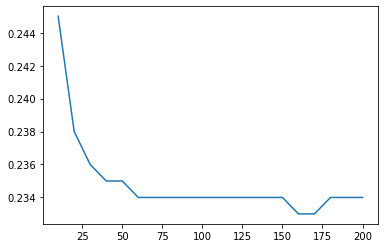

In [101]:
plt.plot(np.array(df_r.n_estimators), np.array(df_r.score.round(3)))


## Question 4

Let's select the best `max_depth`:

* Try different values of `max_depth`: `[10, 15, 20, 25]`
* For each of these values,
  * try different values of `n_estimators` from 10 till 200 (with step 10)
  * calculate the mean RMSE 
* Fix the random seed: `random_state=1`


What's the best `max_depth`, using the mean RMSE?

- [ ] 10
- [ ] 15
- [ ] 20
- [x] 25

In [103]:
def random_forest_md(n_estimators, max_depth):
    rf = RandomForestRegressor(n_estimators=n_estimators, max_depth = max_depth, random_state=1, n_jobs=-1)
    rf.fit(X_train, y_train)
    y_pred = rf.predict(X_val)
    score = rmse(y_val, y_pred)
    
    return f'{n_estimators} - {max_depth}', n_estimators, max_depth, score

In [104]:
results = []
for max_depth in [10, 15, 20, 25]:
    print(f"Getting max_depth: {max_depth}")
    for n_estimators in range(10, 201, 10):
        print(f'Getting n_estimators: {n_estimators}')
        results.append(random_forest_md(n_estimators, max_depth))
    
df_r = pd.DataFrame(results, columns=['description', 'n_estimators', 'max_depth', 'score'])

Getting max_depth: 10
Getting n_estimators: 10
Getting n_estimators: 20
Getting n_estimators: 30
Getting n_estimators: 40
Getting n_estimators: 50
Getting n_estimators: 60
Getting n_estimators: 70
Getting n_estimators: 80
Getting n_estimators: 90
Getting n_estimators: 100
Getting n_estimators: 110
Getting n_estimators: 120
Getting n_estimators: 130
Getting n_estimators: 140
Getting n_estimators: 150
Getting n_estimators: 160
Getting n_estimators: 170
Getting n_estimators: 180
Getting n_estimators: 190
Getting n_estimators: 200
Getting max_depth: 15
Getting n_estimators: 10
Getting n_estimators: 20
Getting n_estimators: 30
Getting n_estimators: 40
Getting n_estimators: 50
Getting n_estimators: 60
Getting n_estimators: 70
Getting n_estimators: 80
Getting n_estimators: 90
Getting n_estimators: 100
Getting n_estimators: 110
Getting n_estimators: 120
Getting n_estimators: 130
Getting n_estimators: 140
Getting n_estimators: 150
Getting n_estimators: 160
Getting n_estimators: 170
Getting n_es

ValueError: 4 columns passed, passed data had 3 columns

In [108]:
df_r = pd.DataFrame(results, columns=['n_estimators', 'max_depth', 'score'])

In [116]:
import duckdb

In [118]:
duckdb.query("""
select * from df_r order by score asc
""")

┌──────────────┬───────────┬─────────────────────┐
│ n_estimators │ max_depth │        score        │
│    int64     │   int64   │       double        │
├──────────────┼───────────┼─────────────────────┤
│          170 │        25 │ 0.23339983684214455 │
│          160 │        25 │ 0.23341036215225164 │
│          150 │        25 │ 0.23347169915504054 │
│          140 │        25 │ 0.23357304849909657 │
│          180 │        25 │ 0.23359026993495474 │
│          170 │        20 │ 0.23359761451451194 │
│          160 │        20 │  0.2336144981280606 │
│          200 │        25 │ 0.23368838871516878 │
│          150 │        20 │ 0.23373382615681193 │
│          180 │        20 │ 0.23374486143139148 │
│           ·  │         · │          ·          │
│           ·  │         · │          ·          │
│           ·  │         · │          ·          │
│          100 │        10 │ 0.24541449344622088 │
│           70 │        10 │ 0.24549477277178658 │
│           10 │        15 │ 0.

# Question 5

We can extract feature importance information from tree-based models. 

At each step of the decision tree learning algorithm, it finds the best split. 
When doing it, we can calculate "gain" - the reduction in impurity before and after the split. 
This gain is quite useful in understanding what are the important features for tree-based models.

In Scikit-Learn, tree-based models contain this information in the
[`feature_importances_`](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor.feature_importances_)
field. 

For this homework question, we'll find the most important feature:

* Train the model with these parameters:
  * `n_estimators=10`,
  * `max_depth=20`,
  * `random_state=1`,
  * `n_jobs=-1` (optional)
* Get the feature importance information from this model


What's the most important feature (among these 4)? 

- [ ] `total_rooms`
- [x] `median_income`
- [ ] `total_bedrooms`
- [ ] `longitude`

In [119]:
rf = RandomForestRegressor(n_estimators=10, max_depth = 20, random_state=1, n_jobs=-1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_val)
score = rmse(y_val, y_pred)

In [121]:
feature_names=list(dv.get_feature_names_out())

In [123]:
feature_importances = list(zip(feature_names, rf.feature_importances_))

In [124]:
importance_df = pd.DataFrame(feature_importances, columns=['feature_names', 'feature_importances'])

In [125]:
importance_df = importance_df.sort_values(by='feature_importances', ascending=False)

In [127]:
import seaborn as sns

Text(0.5, 1.0, 'Feature Importance Chart')

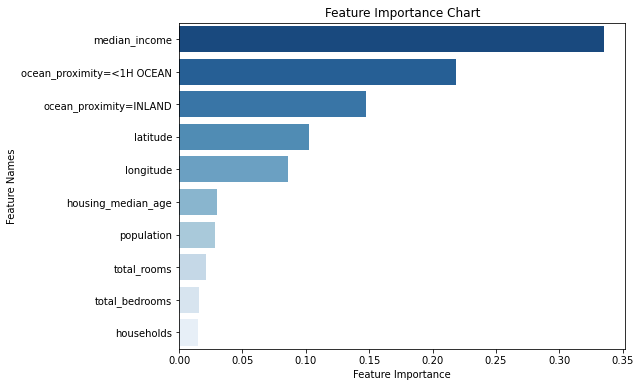

In [128]:
plt.figure(figsize=(8, 6))
sns.barplot(x='feature_importances', y='feature_names', data=importance_df, palette='Blues_r')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Names')
plt.title('Feature Importance Chart')

## Question 6

Now let's train an XGBoost model! For this question, we'll tune the `eta` parameter:

* Install XGBoost
* Create DMatrix for train and validation
* Create a watchlist
* Train a model with these parameters for 100 rounds:

```
xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}
```

Now change `eta` from `0.3` to `0.1`.

Which eta leads to the best RMSE score on the validation dataset?

* 0.3
* 0.1
* Both give equal value

In [129]:
!pip install xgboost

In [130]:
import xgboost as xgb

In [142]:
features = dv.get_feature_names_out().tolist()
features = [f.replace('=<', '_').replace('=', '_') for f in features]
dtrain = xgb.DMatrix(X_train, label=y_train, feature_names=features)
dval = xgb.DMatrix(X_val, label=y_val, feature_names=features)

In [143]:
features

['households',
 'housing_median_age',
 'latitude',
 'longitude',
 'median_income',
 'ocean_proximity_1H OCEAN',
 'ocean_proximity_INLAND',
 'population',
 'total_bedrooms',
 'total_rooms']

In [146]:
def parse_xgb_output(output):
    results = []

    for line in output.stdout.strip().split('\n'):
        it_line, train_line, val_line = line.split('\t')

        it = int(it_line.strip('[]'))
        train = float(train_line.split(':')[1])
        val = float(val_line.split(':')[1])

        results.append((it, train, val))
    
    columns = ['num_iter', 'train_auc', 'val_auc']
    df_results = pd.DataFrame(results, columns=columns)
    return df_results

In [145]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [159]:
%%capture output

xgb_params = {
    'eta': 0.3, 
    'max_depth': 6,
    'min_child_weight': 1,
    
    'objective': 'reg:squarederror',
    'nthread': 8,
    
    'seed': 1,
    'verbosity': 1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=100,
                  verbose_eval=5,
                  evals=watchlist)

In [156]:
scores = {}

In [160]:
key = 'eta=%s' % (xgb_params['eta'])
scores[key] = parse_xgb_output(output)
key

'eta=0.3'

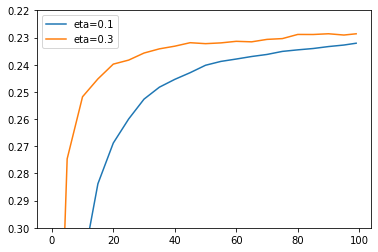

In [167]:
for max_depth, df_score in scores.items():
    plt.plot(np.array(df_score.num_iter), np.array(df_score.val_auc), label=max_depth)

plt.ylim(0.3, 0.22)
plt.legend()

## Submit the results

- Submit your results here: https://forms.gle/Qa2SuzG7QGZNCaoV9
- If your answer doesn't match options exactly, select the closest one.
- You can submit your solution multiple times. In this case, only the last submission will be used

## Deadline

The deadline for submitting is October 23 (Monday), 23:00 CET. After that the form will be closed.